# FIR filter design using the window method

Version: 1.0, Date: march, 2017

In [1]:
# Imports

import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
%matplotlib inline


The impulse response of the ideal low pass filter, which has $f_c$ cutoff frequency is:

$$h(t) = 2f_c sinc(2\pi f_ct) = 2f_c \frac{sin(2\pi f_c t)}{2\pi f_c t} = \frac{sin(2\pi f_ct)}{\pi t}$$

In digital signal processing it is common to use the normalized cutoff frequency: $f_c/f_s$ , where $f_s$ is the sampling frequency. As we are dealing with digitaly sampled signals, a low pass filter cutoff frequency must be under the half of the sampling frquency, thus the normalized sampling frequency is: $f_c \leq 0.5$

Let us inspect the impulse response of a low-pass filter that passes frequency components from DC to $0.4 f_s$. 


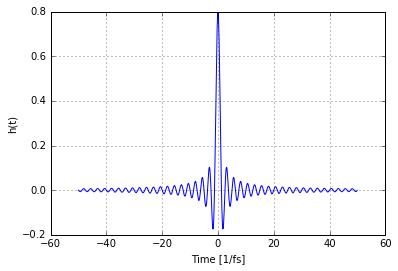

In [3]:
fc = 0.4
x  = np.arange(-50,50,0.1)
hx = 2*fc * np.sin(2*np.pi*fc*x)/(2*np.pi*fc*x)

plt.plot(x,hx)
plt.xlabel("Time [1/fs]")
plt.ylabel("h(t)")
plt.grid(True)


As the cutoff frequency is normalized, time dimension of the impulse response is also normalized to the sampling interval. The following figure illustrates impulse responses for different cutoff frequencies. (The time scale is less than in the previous one.)

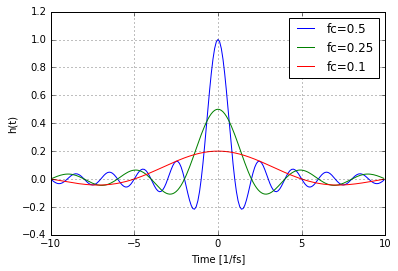

In [4]:
x  = np.arange(-10,10,0.1)
fc = 0.5
hx = 2*fc * np.sin(2*np.pi*fc*x)/(2*np.pi*fc*x)
plt.plot(x,hx)

fc = 0.25
hx = 2*fc * np.sin(2*np.pi*fc*x)/(2*np.pi*fc*x)
plt.plot(x,hx)

fc = 0.1
hx = 2*fc * np.sin(2*np.pi*fc*x)/(2*np.pi*fc*x)
plt.plot(x,hx)

plt.xlabel("Time [1/fs]")
plt.ylabel("h(t)")
plt.legend(("fc=0.5","fc=0.25","fc=0.1"))
plt.grid(True)

The discrete signal at the output of the FIR filter is described by the following formula:

$$ y[n] = \sum_{i=0}^{M-1} w_i \delta[n-iT_s]$$, where $T_s$ is the sampling interval, $w_i$ are the coefficients of the FIR filter $i=0 ... {M-1}$.

We can produce the desired impulse response using an FIR filter by substituting the samples of the impulse response in place of the FIR filter coefficients.
Unfortunatelly we are not able to realize a filter which has the previously described impulse response as:
- It has infinite impulse response, and our filter impulse response is finite.
- It is not causal.Thus such a filter would use samples from the future to calculate the current output.

In order to overcome these problems, the utilized impulse response is restricted to a finite time range and it is shifted backward in time. 
Thus we need to samples the impulse response of the ideal low pass filter in $M$ points with $T_s$ time spacing.Beside this in order to create a causal filter we also shift the impulse response in time by $M/2 T_s$.

We must emphasize that in such cases when the FIR filter coefficient number is odd, then we must calculate the ideal low pass filter response at $t=0$ which may leads to numberical problems due to the division by zero. However the limit of the sinc() function at $0$ is known, that is $1$. Thus we must set the corresponding coefficient value to $2f_c$. In the following demonstrations we are going to calculate with even number of coefficients.

FIR coefficient index: 0, value 0.057226
FIR coefficient index: 1, value 0.028104
FIR coefficient index: 2, value -0.127324
FIR coefficient index: 3, value 0.065575
FIR coefficient index: 4, value 0.515036
FIR coefficient index: 5, value 0.515036
FIR coefficient index: 6, value 0.065575
FIR coefficient index: 7, value -0.127324
FIR coefficient index: 8, value 0.028104
FIR coefficient index: 9, value 0.057226


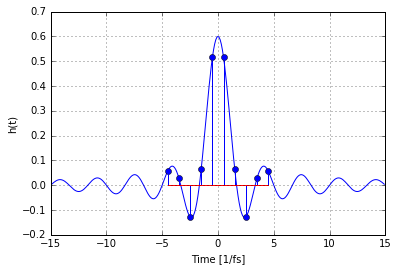

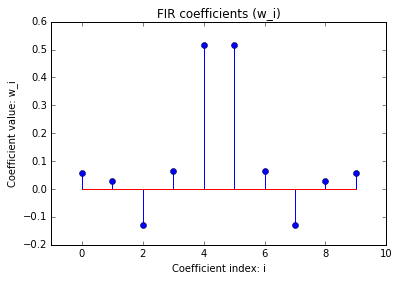

In [8]:
# Parameters
M = 10  # FIR filter tap number
fc = 0.3 # Cutoff frequency

# Ideal response
x  = np.arange(-15,15,0.1)
hx = 2*fc * np.sin(2*np.pi*fc*x)/(2*np.pi*fc*x)

# Samples response
x_FIR_samples = np.arange(-M/2+0.5,(M)/2+0.5,1) # Spacing is 1
FIR_samples   = 2*fc * np.sin(2*np.pi*fc*x_FIR_samples)/(2*np.pi*fc*x_FIR_samples)

# Time shift
time_offset = M/2-0.5  # (Ts=1 as we normalized everything to fs)

# Plotting
plt.plot(x,hx)
plt.xlabel("Time [1/fs]")
plt.ylabel("h(t)")
plt.stem(x_FIR_samples, FIR_samples, basefmt='r-')
plt.grid(True)

plt.figure(2)
plt.title("FIR coefficients (w_i)")
plt.xlabel("Coefficient index: i")
plt.ylabel("Coefficient value: w_i")
plt.stem(x_FIR_samples+time_offset, FIR_samples, basefmt='r-')
plt.xlim(x_FIR_samples[0]+time_offset-1, x_FIR_samples[M-1]+time_offset+1)

for i in range(M):    
    print("FIR coefficient index: %d, value %f"%(x_FIR_samples[i]+time_offset,FIR_samples[i]))



Finally design a low pass FIR filter with the desired parameters and show its response in the frequency domain.

In [9]:
# These functions are used to plot the requency and phase response of an FIR filter. See [2]
def plot_transfer_amp(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * np.log10 (abs(h))
    
    plt.plot(w/max(w)/2,h_dB)
    plt.ylim(-50, 20)
    plt.ylabel('Magnitude (db)')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Frequency response')    
    
def plot_transfer_phase(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * np.log10 (abs(h))
    
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)))
    plt.plot(w/max(w),h_Phase)
    plt.ylabel('Phase (radians)')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Phase response')
    plt.subplots_adjust(hspace=0.5)


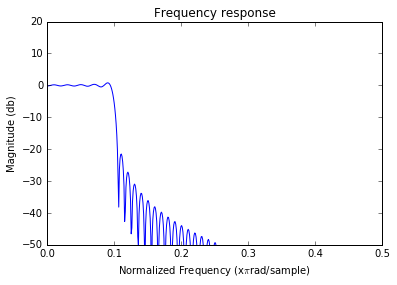

In [10]:
M = 100  # Number of filter taps
fs = 64 *10**6  # Sampling frequency  [Hz]
fc = 16 *10**6  # Cut of frequency [Hz]

fc_norm = fc/fs  # Normalized cut of frequency 

fc = 0.1
x  =  np.arange(-M/2+0.5,(M)/2+0.5,1) 
FIR_coeffs = 2*fc * np.sin(2*np.pi*fc*x)/(2*np.pi*fc*x)

""" Uncomment to display coefficients
# Time shift
time_offset = M/2-0.5  # (Ts=1 as we normalized everything to fs)
for i in range(M):    
    print("FIR egyutthato index: %d, ertek %f"%(x[i]+time_offset,FIR_coeffs[i]))
"""    
plot_transfer_amp(FIR_coeffs)


## References 

   [1] Dr. Andrew Greensted, FIR FIlter by Windowing, http://www.labbookpages.co.uk/audio/firWindowing.html, 2017 march  
   [2] Matti Pastel, FIR filter design with Python and SciPy, http://mpastell.com/pweave/_downloads/FIR_design_rst.html, 2017 march